## Importing libraries

In [1]:
import pandas as pd
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version = 0.1.463. 
             m, feats, trainm, testm = Auto_ViML(train, target, test, 
                                    sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=None,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False, 
                                    verbose=0)
            
To remove previous versions, perform 'pip uninstall autoviml'


In [2]:
url1 = '../dataset/dataset_treino.csv'
url2 = '../dataset/dataset_teste.csv'
url3 = '../dataset/sample_submission.csv'
train = pd.read_csv(url1,index_col=None)
test = pd.read_csv(url2,index_col=None)
sample_submission = pd.read_csv(url3,index_col=None)
print(train.shape,test.shape,sample_submission.shape)

(114321, 133) (114393, 132) (114393, 2)


In [3]:
sample_submission = ''
scoring_parameter = 'logloss'
target='target'

In [4]:
train.fillna(train.mean(),inplace=True)
test.fillna(test.mean(),inplace=True)

Train (Size: 114321,133) has Single_Label with target: ['target']
"
 ################### Binary-Class ##################### " 
Shuffling the data set before training
 Class  -> Counts -> Percent
     1:   87021  ->   76.1%
     0:   27300  ->   23.9%
Selecting 2-Class Classifier...
    Using GridSearchCV for Hyper Parameter tuning...
    Target target is already numeric. No transformation done.
    Top columns in Train with missing values: ['v30', 'v113', 'v56', 'v31', 'v3']
         and their missing value totals: [60110, 55304, 6882, 3457, 3457]
Classifying variables in data set...
    Number of Numeric Columns =  108
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  13
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  6
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1

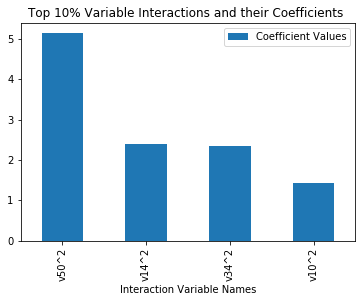

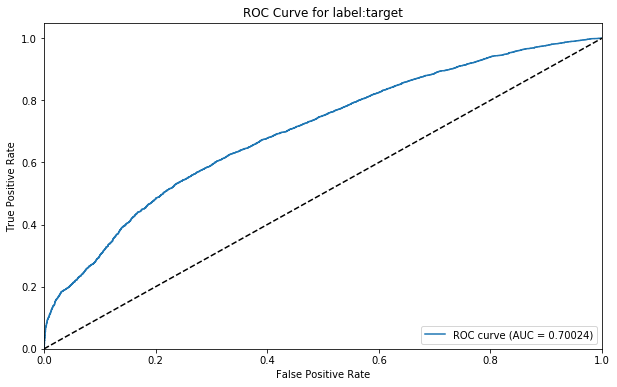

Average precision-recall score: 0.88
Macro F1 score, averaged over all classes: 0.43


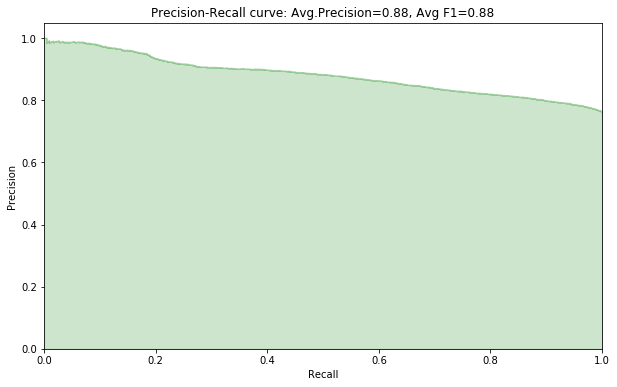

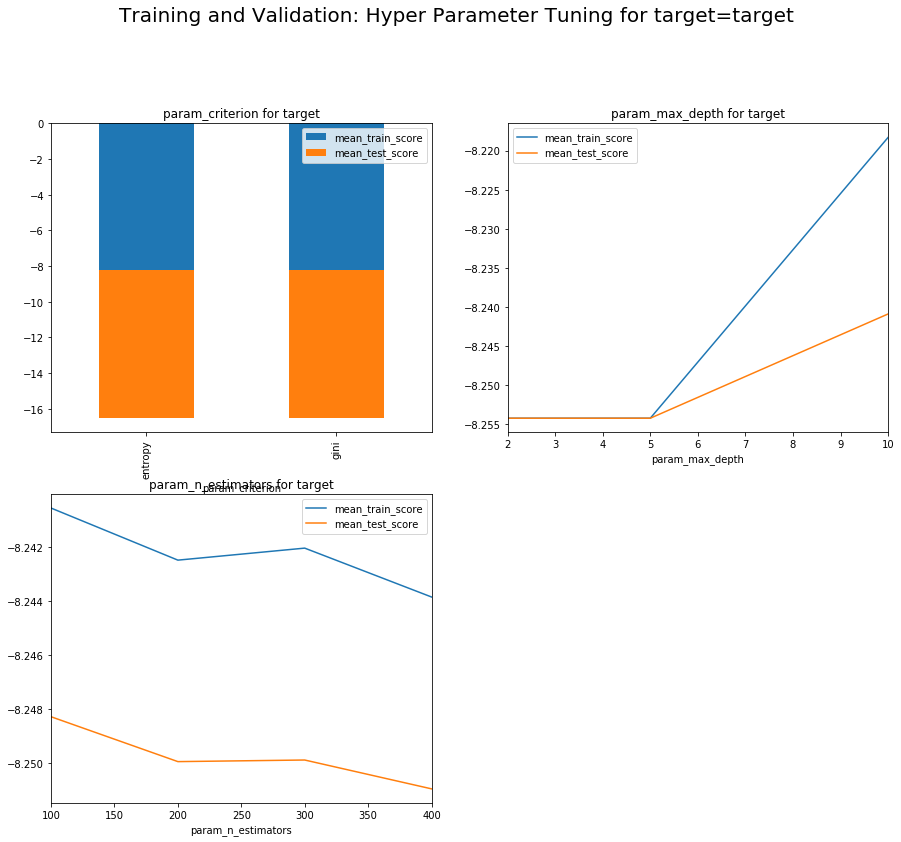

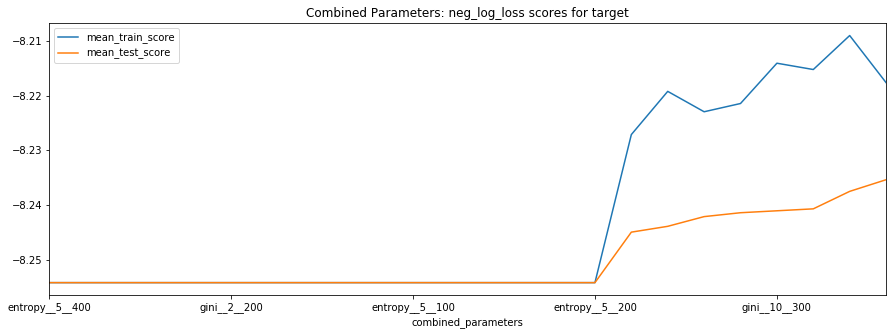

    Time taken for this Target (in seconds) = 3337


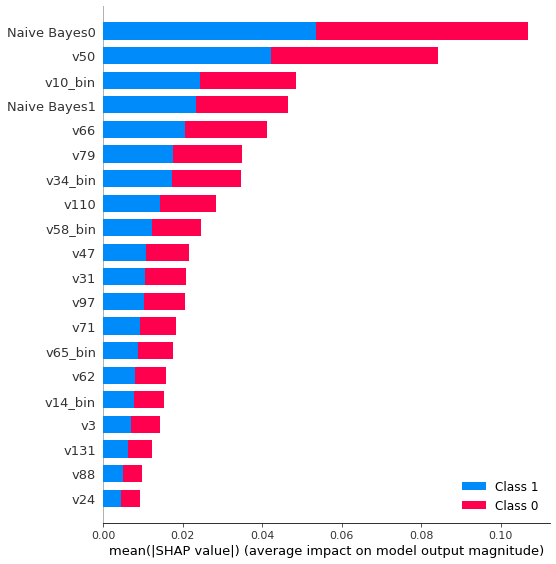

Plotting SHAP (first 10,000) values to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
Entropy Binning 10 continuous variables...
    Binning and replacing 10 numeric features.
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Adding 2 Stacking feature(s) to training data

Imbalanced Class Training using Majority Class Downsampling method...
Rare Class = 0
    Pct of Rare Class in data = 23.88%
    Number of iterations for training =  1
  Rare Class Batch Size = 27300
  Majority Class Batch Size = 87021
     1. Training Batch Size = 114321
        Training Batch incident rate: 23.9%
             Batch Training completed
        Time Taken = 2 (in seconds)
Test Data predictions using Best Threshold = 0.55
    Saving predictions to ./target/target_Binary_Classification_test_modified.csv
    Saving predictions to ./target/t

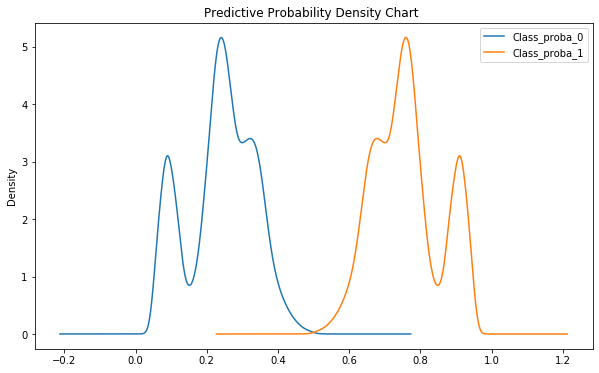

In [10]:
#### If Boosting_Flag = True => XGBoost, Fase=>ExtraTrees, None=>Linear Model
m, feats, trainm, testm = Auto_ViML(train, target, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',
                                    feature_reduction=True,
                                    Boosting_Flag=False,
                                    Binning_Flag=True,
                                    Add_Poly=2, 
                                    Stacking_Flag=True,                                    
                                    Imbalanced_Flag=True, 
                                    verbose=2)

In [11]:
submission = pd.read_csv('target/target_Binary_Classification_submission.csv',index_col=None)

In [12]:
submission.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v125,v126,v127,v128,v129,v130,v131,Class_proba_0,Class_proba_1,target_Stacked_predictions
0,0,1.375465e+00,11.361141,C,4.200778,6.577000,2.081784,1.784386,0.011094,9.523810,...,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00,0.342483,0.657517,1
1,1,1.628623e+00,7.436088,C,4.141265,8.739797,2.435884,2.482134,1.512246,9.031840,...,I,1.672504,3.237892,2.028595,0,1.932408,1.736256e+00,0.140785,0.859215,1
2,2,-4.903407e-07,8.201529,C,4.544371,6.550100,1.558442,2.467532,0.007164,7.142858,...,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07,0.256234,0.743766,1
3,7,2.661870e+00,3.041241,C,1.657216,9.773080,2.078337,1.430855,1.252157,7.959596,...,B,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00,0.365814,0.634186,1
4,10,1.252822e+00,11.283352,C,4.638388,8.520510,2.302484,3.510159,0.074263,7.612904,...,A,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00,0.347751,0.652249,1
